# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [10]:
# Identify all columns with null values
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [8]:
# Show DepDelay where DepDel15 is null
df_flights[df_flights['DepDel15'].isnull()]['DepDelay']

171       0
359       0
429       0
545       0
554       0
         ..
271410    0
271607    0
271634    0
271671    0
271885    0
Name: DepDelay, Length: 2761, dtype: int64

In [9]:
# Inplace update depdel15 to 0 when null
df_flights['DepDel15'].fillna(0, inplace=True)

In [14]:
# Remove columns where DepDelay is higher than 90th percentile
df_flights = df_flights[df_flights['ArrDelay'] <= df_flights['ArrDelay'].quantile(.90)]

In [15]:
# Display 100 rows
df_flights.head(100)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2013,5,10,5,WN,14908,John Wayne Airport-Orange County,Santa Ana,CA,12191,William P Hobby,Houston,TX,1415,0,0.0,1920,-7,0,0
119,2013,8,14,3,DL,15304,Tampa International,Tampa,FL,12953,LaGuardia,New York,NY,1850,-4,0.0,2138,-8,0,0
122,2013,9,8,7,UA,14057,Portland International,Portland,OR,13930,Chicago O'Hare International,Chicago,IL,1039,-8,0.0,1633,1,0,0
123,2013,4,14,7,DL,11433,Detroit Metro Wayne County,Detroit,MI,10693,Nashville International,Nashville,TN,845,3,0.0,922,4,0,0


<Axes: xlabel='DestAirportName'>

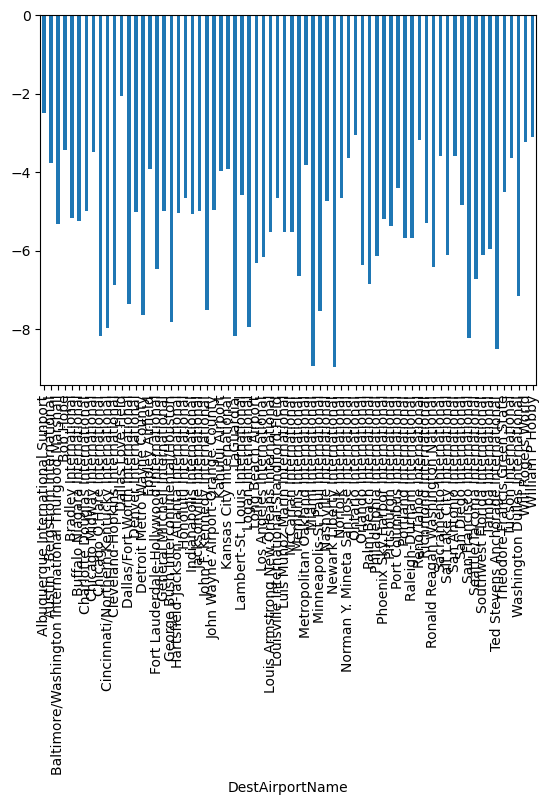

In [19]:
# Display bar chart showing average ArrDelay by DestAirportName
df_flights.groupby('DestAirportName')['ArrDelay'].mean().plot.bar()

In [21]:
# Column names in the dataset:
# ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
#       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
#       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
#       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
#       'ArrDel15', 'Cancelled'],

In [26]:
# Create a model to predict how likely a flight is to be delayed based on the day of the week and arrival airport
# Use a logistic regression model
# Split the data into training and test sets
# Train the model
# Calculate the accuracy of the model

# Create the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a dataframe with the features and target with good feature names
X = df_flights[['DayOfWeek', 'DestAirportID']]
y = df_flights['ArrDel15']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create the model with valid feature names
model = LogisticRegression(solver='lbfgs')

# Train the model with feature names
model.fit(X_train, y_train)

# Calculate the accuracy of the model
model.score(X_test, y_test)


0.9604968988893697

In [27]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[53273,     0],
       [ 2191,     0]])

In [28]:
# Show odds flight will be delayed to Las Vegas on a Monday
model.predict_proba([[1, 12892]])

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.9621474, 0.0378526]])

In [30]:
# Get unique column values for origin airport and id and export to CSV
df_flights[['OriginAirportID', 'OriginAirportName']].drop_duplicates().to_csv('data/airports.csv', index=False)

In [ ]:
# Save the model to a file to import later into flask
import pickle
pickle.dump(model, open('data/model.pkl', 'wb'))
